## init

In [2]:
# import sys 
# sys.path.append('pyfiles/')

from pyfiles import (parametrics as par,
    complex as cplx,
    matrix as mat,
    vineyard as vin,
    input as inp,
    plot as ourplot
)

# so we don't have to reboot kernel every time we modify classes.py
%load_ext autoreload
%autoreload 2

# math stuff
import numpy as np
import math
from collections import defaultdict
# visualization
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.ndimage import gaussian_filter1d
from scipy.spatial import distance
from scipy.stats import qmc
from copy import deepcopy

import matplotlib.pyplot as plt
%matplotlib inline

import csv
import string

# for polygon grid
from matplotlib.path import Path as mplPath

######## NOTE: from this point on, order is important. 
# it would be good to make the code more robust, but right
# now, there are ordered dependencies between functions.

## this is the new, streamlined thing

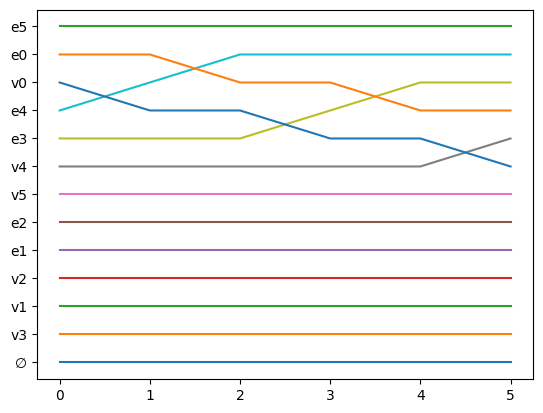

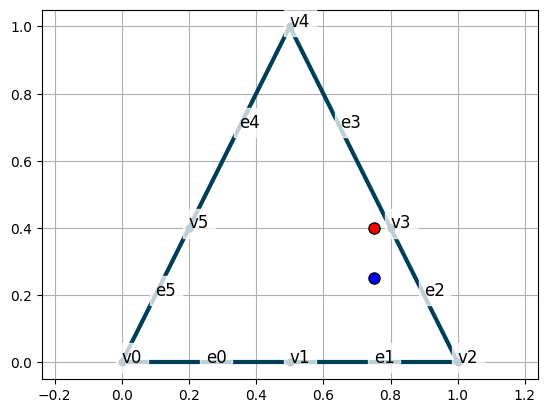

∅ — v3 — v1 — v2 — e1 — e2 — v5 — v4 — e3 — e4 — v0 — e0 — e5
∅ — v3 — v1 — v2 — e1 — e2 — v5 — v0 — v4 — e0 — e3 — e4 — e5
Swaps:
  v0 — e4
  e0 — e4
  v0 — e3
  e0 — e3
  v0 — v4


In [96]:
our_complex = inp.read_obj("input/triangle.obj")
key_point1 = (0.75, 0.40)
key_point2 = (0.75, 0.25)
o = cplx.ordering.by_dist_to(our_complex, key_point1)
o2 = cplx.ordering.by_dist_to(our_complex, key_point2)
matrix = mat.bdmatrix.from_ordering(o)
# with ourplot.PandasMatrix(matrix, o) as p:
#     matrix.reduce(every_step=p.every_step)

def every_step(mat, indices, old_j):
    (j, j0) = indices # col(j) ^= col(j0)
    if not mat[j]:
        # print(f'{j0} killed {j}')
        pass

bettis = defaultdict(int)
def after_column_reduced(mat, j):
    if mat.get(j, set()):
        death = o.simplex(j)
        birth = o.simplex(max(mat.get(j, set())))
        bettis[birth.dim()] -= 1
        print(f'col {j}:')
        print(f'  birth={birth}')
        print(f'  death={death}')
    else:
        s = o.simplex(j)
        bettis[s.dim()] += 1
        print(f'col {j}: reduced to zero: {s}')

# matrix.reduce(every_step=every_step, 
#               after_column_reduced=after_column_reduced);
# print(bettis)

# plot the complex with a heatmap from the key point
# ourplot.plot_complex(our_complex)pt



# swaps, lst = o.compute_transpositions(o2)

# def indices_of(numbers, other_list):
#     '''
#     For elements `[a, b, c]` we want to find the positions of each element
#     in `other_list`. If `other_list == [b, a, c]` we want to get `[1, 0, 2]`,
#     because `a` is in index 1, b in index 0, and c in index 2 in `other_list`.
#     '''
#     indices = []
#     for e in numbers:
#         i = other_list.index(e)
#         indices.append(i)
#     return indices

# lst = [indices_of(lst[0], l) for l in lst]

# plt.plot(lst);
# plt.yticks(range(len(lst[0])), [f'{o.simplex(i).prettyrepr()}' for i in range(len(lst[0]))]);
# from pprint import pprint
# pprint(lst)
# print(o)
# print(o2)
# pprint(swaps)
ourplot.plot_orders_with_bubbles(o, o2)

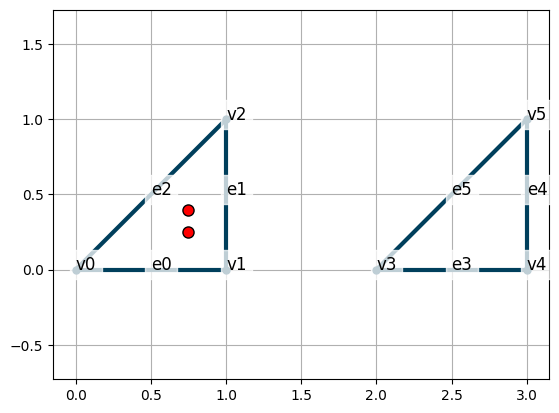

In [53]:
ourplot.plot_complex(our_complex, label_edges=True, label_verts=True)
plt.plot(*key_point1, color='black', marker='o', markersize=8)
plt.plot(*key_point1, color='red', marker='o', markersize=6)
plt.plot(*key_point2, color='black', marker='o', markersize=8)
plt.plot(*key_point2, color='red', marker='o', markersize=6)